In [29]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
colnames=['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income']

In [31]:
income=pd.read_csv("../income/adult.data",header=None)

In [32]:
income.columns=colnames

In [33]:
target=(income['income']==' >50K').astype('int')

In [34]:
income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [35]:
income=income.drop(['income'],axis=1)

In [36]:
cont=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [37]:
for col in cont:
    income[col]=(income[col]-income[col].min())/(income[col].max()-income[col].min())

In [38]:
cat=[i for i in income.columns if i not in cont]
cat_ind=[i for i in range(len(income.columns)) if income.columns[i] not in cont]


In [39]:
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [40]:
class onehot:
    def __init__(self):
        self.encoder={}
        self.decoder={}
        self.n_cats=0
    def encode(self,col):
        cats=np.unique(col)
        self.n_cats=len(cats)
        n=0
        for i in cats:
            self.encoder[i]=n
            self.decoder[n]=i
            n+=1
        
        output=[]
        for i in col:
            code=[0]*self.n_cats
            code[self.encoder[i]]=1
            output.append(code)
        return np.array(output)
    def decode(self,col):
        output=[]
        card=np.arange(self.n_cats)
        for i in col:
            n=i@card.T
            output.append(self.decoder[n])       
        return output

In [41]:
a=onehot()

In [42]:
o=a.encode(income.values[:,1])
b=a.decode(o)

In [43]:
nrow,ncol=income.values.shape

In [44]:
trans_collect={}
new_data=[]

for col in cat_ind:
    
    name=income.columns[col]
    tran=onehot()
    onehot_vec=tran.encode(income.values[:,col])
    trans_collect[name]=tran
    if new_data==[]:
        new_data=onehot_vec
    else:
        new_data=np.concatenate((new_data,onehot_vec),axis=1)

/home/yicheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


In [45]:
new_data.shape

(32561, 102)

In [46]:
cont_data=income[cont].values

In [47]:
new_data=np.concatenate((new_data,cont_data),axis=1)

In [48]:
new_data.shape

(32561, 108)

In [49]:
train_x=new_data[:20000]
test_x=new_data[20000:]

train_y=target.values[:20000]
test_y=target.values[20000:]

## Model

## (1,-1) binary label for adaboost and svm

In [50]:
train_x=train_x
train_y=train_y*2-1
test_x=test_x
test_y=test_y*2-1

# Test

In [23]:
import sys
sys.path.insert(0,'/home/yicheng/DS/Relics/models')

In [23]:
from logistic_regression import logistic_model

In [25]:
from decision_tree import decision_tree

In [32]:
from random_forest import random_forest

In [31]:
from ada_boost import ada_boost

In [24]:
from svm_subgrad import svm_subgrad

## Error Threshold: 0.24

In [51]:
from sklearn import metrics

train_acc=[]
test_acc=[]

test_auc=[]
for i in range(1,5):
    print(i)
    
    train_seg=100
    
    #logistic regression
#     model=logistic_model()
    #decision tree
#     model=decision_tree()
    #adaboost
#     model=ada_boost()
    #random forest
#     model=random_forest()
    #svm_subgrad
    model=svm_subgrad()
    
    
    #logistic regression
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],limit=1e3,verbose=False)
    
    #decision tree
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],max_depth=3,min_sample=5)
    
#     ada_boost
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],n_iter=3)
    
    #random forest
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],n_estimator=10,sample_rate=0.7,max_depth=3,min_sample=5)
    
    #svm_subgrad
    print(train_seg)
    model.fit(train_x[:train_seg*i],train_y[:train_seg*i],0.01,0.05,500)
    
    #check training acc
    
    pred=model.predict(train_x[:train_seg*i]) 
    mis=sum(abs(pred>0-train_y[:train_seg*i]))/len(pred)
    train_acc.append(1-mis)
    
    #check testing acc
    
    pred=model.predict(test_x)
    mis=sum(abs(pred>0-test_y))/len(pred)
    test_acc.append(1-mis)
    
    fpr, tpr, thresholds = metrics.roc_curve(test_y, pred, pos_label=1)
    AUC=metrics.auc(fpr, tpr)
    test_auc.append(AUC)
    

1
100
4.498825340969777
4.343894555889912
4.189118701595126
4.0344976231546354
3.8800311657925857
3.7257191748878973
3.5715614959741133
3.417557974739245
3.2637084570256105
3.11001278882969
2.956470816301964
2.803082385746767
2.6498473436221253
2.496765536539607
2.3441011810002412
2.1972669560744533
2.0505795653735914
1.9045815196787246
1.7645401383873425
1.6378099822725798
1.5209920620666104
1.4042909597808468
1.2910669504308914
1.1871007955861859
1.0878537928884138
0.9970820012417664
0.9311231441909987
0.880499219083839
0.843555826495688
0.8125715363663162
0.7870596086596748
0.7635442990593853
0.7435504765579328
0.7287986671352857
0.7173978344571447
0.7078223947676175
0.6988179090406992
0.6904789984026314
0.6839339510087648
0.67768260450614
0.6714375093500183
0.6651986592890523
0.6591466199475949
0.6538757950599368
0.6491661000942527
0.6444611148235343
0.6401683106892463
0.6361909651126291
0.6321725263589294
0.6281581060439835
0.6242001981405615
0.620243699768645
0.6162911578951004
0

2
100
4.3816756814403455
4.225084605112085
4.068650119860151
3.91237206909347
3.756250296377556
3.600284645434357
3.444474960142101
3.288821084535138
3.133322862803782
2.9779801392941567
2.8227927585080415
2.6677605651027125
2.513459496507007
2.3625446943035415
2.2142943922849487
2.069816054456838
1.9332479969924905
1.799320399958654
1.6710430676066579
1.5536957393752795
1.4525781966273938
1.3673451204615432
1.2878390636225847
1.2138942219145767
1.144258048614022
1.0816965629733895
1.025157427396381
0.9724832174897335
0.9274461021383444
0.887236771126073
0.8512335592393532
0.8204668214814869
0.7935420481702267
0.7706610332605638
0.7531224759388675
0.7390553146700014
0.7284037620567787
0.7200750049671946
0.7135336388323004
0.707561029002988
0.701898202707286
0.6962410392378797
0.6906536305608444
0.6856720694145875
0.6812116152207881
0.6768141671112582
0.6724681478592714
0.6682482295580944
0.6641381632430347
0.6601660512698234
0.6566881813456191
0.6532746746415842
0.649864581444253
0.646

0.6827151391419699
0.6787750856180021
0.674934869315435
0.6713507682855906
0.6678438757999907
0.6643894437968002
0.6609904277266946
0.6576406669637208
0.6543729873580831
0.651108575432051
0.6478562004729154
0.6446660989620308
0.6414791875526572
0.638369138011381
0.6353699915826518
0.6323962218578835
0.6294792533099273
0.6266210000052388
0.6237755218658693
0.6210432782436112
0.6183950113282617
0.6157777325062432
0.6132654888073928
0.6107992620426091
0.6084006057079694
0.6060129610776542
0.6036611373238162
0.6013874853076282
0.5991161069434565
0.5968558646617189
0.5946289864221437
0.5924043350608077
0.5901819083508333
0.5879617040675688
0.5857639688845808
0.5836270434703893
0.5815444640864265
0.5794639672818475
0.5774193837255394
0.5754354067111355
0.5734937609405794
0.5716303391457703
0.5698126432533744
0.5680535266950799
0.5663921979098354
0.5647673733095001
0.5631441735337652
0.5615321626815047
0.5600312455928717
0.5585500830227863
0.5571095272095047
0.5557023765784836
0.5543199396130

4
100
3.7612467041545035
3.6048214924144695
3.4485527058861765
3.292440188144411
3.1364837829203873
2.9806833341015873
2.825038685731607
2.669549682009996
2.514216167292107
2.359236629627243
2.2058839494507643
2.05353660429448
1.9076365409911404
1.77135481311505
1.6463529456111103
1.5318261493980299
1.4294757879961457
1.3371916616760342
1.2516472404122783
1.1717644317011666
1.0967436424208434
1.0283359154631213
0.970639670596005
0.9213853633966638
0.8763522292759839
0.8367743790764862
0.8029773075816833
0.7719846376474386
0.7450260079927159
0.7231290606132424
0.7051769607645411
0.6911062204076137
0.6797265214225021
0.6701972441807682
0.6618729287192309
0.6542902272703176
0.6479325997591198
0.6423676706539142
0.6376928081287216
0.6332604486069157
0.6292832681228852
0.6256771724813022
0.6221340837791075
0.6186197031137743
0.615137475213692
0.61173094375847
0.6084898770232284
0.6053147089902408
0.6023175458180454
0.599392396669411
0.596589032178522
0.5939367606189584
0.5913241002309272
0.

0.38680090993939276
0.38666062747344354
0.3865189504046209
0.3863800993154445
0.38623745021243977
0.38609950751845806
0.38596934878582445
0.38583643011311625
0.3856853706594859
0.38554923728873775
0.385399698162628
0.3852628057547183
0.3851234230593114
0.3849830893377188
0.3848641157463998
0.38471568285359
0.384588111710183
0.384439197031917
0.384313543471513
0.3841719262312708
0.3840295644327024
0.38388432211436213
0.38374703585672215
0.3836141582288154
0.38349938319709925
0.38337417641177646
0.3832245187479991
0.38308905418476386
0.38295149790022615
0.3828249951829023
0.3826961979123024
0.38256728079719665
0.3824407589165717
0.38231002980301654
0.382170899534382
0.38203794388983636
0.38189290115841584
0.3817571975550521
0.38162370096064163
0.3814931812678279
0.38136360287251625
0.3812336971057146
0.3811060072861972
0.3809794140786335
0.38085159562924104
0.380720566976788
0.3805962398507138
0.38047274103709144
0.38034762962522123
0.38022007454237
0.38008683372501145
0.3799647189993198

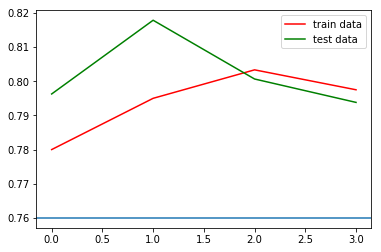

In [52]:
plt.plot(train_acc,color='r',label='train data')
plt.plot(test_acc,color='g',label='test data')
plt.axhline(y=0.76)
plt.legend()

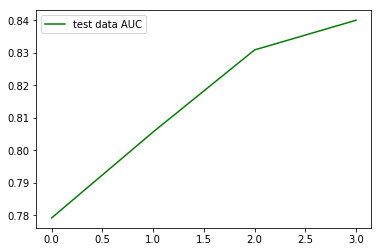

In [53]:
# plt.plot(train_acc,color='r',label='train data')
plt.plot(test_auc,color='g',label='test data AUC')
plt.legend()